---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Distributions in Pandas

- Distribution: Set of all possible random variables
- Example:
  - Flipping Coins for heads and tails
    - A binomial distribution (two possible outcomes)
    - Discrete (categories of heads and tails, no real numbers)
    - Evenly weighted (heads are just as likely as tails)
  - Tornado events in Ann Arbor
    - Binomial distribution
    - Discrete
    - Evenly Weighted (tornadoes are rare events)

In [1]:
import pandas as pd
import numpy as np

Q.) Suppose we want to simulate the probability of flipping a fair coin 20 times, and getting a number greater than or equal to 15. Use np.random.binomial(n,p,size) to do 10,000 simulations of flipping a fair coin 20 times, then see what proportion of the simulations are 15 or greater

In [2]:
# probability of getting heads is 0.5 
# Each number in the array represents the number of heads that appeared 
# when we tossed a fair coin 20 times

x = np.random.binomial(20, .5, 10000)
x

array([ 8,  6, 11, ..., 12, 13, 10])

In [3]:
print((x>=15).mean())

0.0214


In [4]:
np.random.binomial(1, 0.5) 
# first num : num of times we want to run
# second num is
# the probability we get a one(represent heads in the flipping coin example)

1

In [5]:
np.random.binomial(1000, 0.5)/1000

0.492

In [6]:
chance_of_tornado = 0.01/100
np.random.binomial(100000, chance_of_tornado)

11

In [7]:
chance_of_tornado = 0.01

tornado_events = np.random.binomial(1, chance_of_tornado, 1000000)
    
two_days_in_a_row = 0
for j in range(1,len(tornado_events)-1):
    if tornado_events[j]==1 and tornado_events[j-1]==1:
        two_days_in_a_row+=1

print('{} tornadoes back to back in {} years'.format(two_days_in_a_row, 1000000/365))

109 tornadoes back to back in 2739.72602739726 years


##### numpy.random.uniform(low=0.0, high=1.0, size=None)

Draw samples from a uniform distribution.

Samples are uniformly distributed over the half-open interval [low, high). Any value within the given interval is equally likely to be drawn by uniform.

In [8]:
# continuous uniform distribution
np.random.uniform(0, 1)

0.825675900668077

In [9]:
np.random.uniform(0, 1, (2,3))

array([[ 0.42925618,  0.90465707,  0.37690839],
       [ 0.23310276,  0.09981231,  0.82957233]])

In [10]:
np.random.uniform(0, 3, (2,3,2))

array([[[ 0.45093543,  1.5852316 ],
        [ 2.26796651,  2.27047401],
        [ 0.75719257,  1.37479599]],

       [[ 0.05313821,  0.59600902],
        [ 1.73677327,  0.41346589],
        [ 0.70799292,  1.64216028]]])

##### numpy.random.normal(loc=0.0, scale=1.0, size=None)
- loc : Mean / expected value of distribution
- scale: standard deviation of distribution

In [11]:
np.random.normal(0.75)

0.7498448988990208

Formula for standard deviation
$$\sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2}$$

In [12]:
# expected value: 0.75 / 1000 samples
distribution = np.random.normal(0.75,size=1000)

np.sqrt(np.sum((np.mean(distribution)-distribution)**2)/len(distribution))

1.0028932698251447

In [13]:
np.std(distribution)

1.0028932698251447

In [14]:
import scipy.stats as stats
stats.kurtosis(distribution)

-0.005198228476250399

In [15]:
stats.skew(distribution)

-0.09415941570869425

###### numpy.random.chisquare(df, size=None)

- When df independent random variables, each with standard normal distributions (mean 0, variance 1), are squared and summed, the resulting distribution is chi-square
- degrees of freedom(df) : number(int) or array-like of ints (df should be > 0)

In [16]:
np.random.chisquare(2,4)

array([ 0.29245554,  1.18328216,  0.82447419,  0.01540405])

##### scipy.stats.skew(a, axis=0, bias=True, nan_policy='propagate')

- Computes the skewness of a data set.
- For normally distributed data, the skewness should be about 0. A skewness value > 0 means that there is more weight in the left tail of the distribution.

  - a : ndarray, data
  - axis: Axis long which skewness is calculated
  - bias: If False, then the calculations are corrected for statistical bias
  - nan_policy: Defines how to handle when input contains nan. ‘propagate’ returns nan, ‘raise’ throws an error, ‘omit’ performs the calculations ignoring nan values. Default is 'propagate'

In [17]:
chi_squared_df2 = np.random.chisquare(2, size=10000)
stats.skew(chi_squared_df2)

1.9691225819180074

In [18]:
chi_squared_df5 = np.random.chisquare(5, size=10000)
stats.skew(chi_squared_df5)

1.2440250586967718

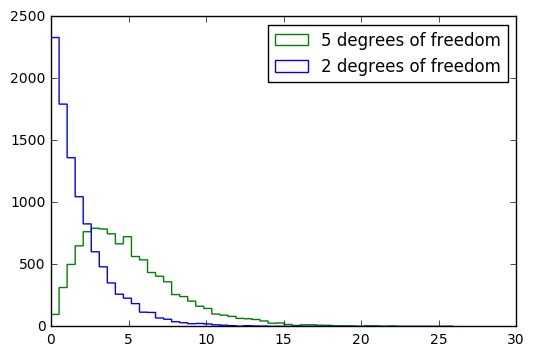

In [19]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_squared_df2,chi_squared_df5], bins=50, histtype='step', 
                  label=['2 degrees of freedom','5 degrees of freedom'])
plt.legend(loc='upper right')


# Hypothesis Testing

##### Hypothesis: A statement we can test
- Alternative hypothesis: Our idea, e.g. there is a difference between groups
- Null hypothesis: The alternative of our idea, e.g. there is no difference between groups
- Critical Value alpha
  - The threshold as to how much chance you are willing to accept
  - Typical values in social sciences are 0.1, 0.05 or 0.01

In [20]:
df = pd.read_csv('grades.csv')

In [21]:
df.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,2016-04-30 06:50:39.801000000,68.824532,2016-04-30 17:20:38.727000000,61.942079,2016-05-12 07:47:16.326000000,49.553663,2016-05-07 16:09:20.485000000,49.553663,2016-05-24 12:51:18.016000000,44.598297,2016-05-26 08:09:12.058000000
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,2015-12-13 17:06:10.750000000,51.491040,2015-12-14 12:25:12.056000000,41.932832,2015-12-29 14:25:22.594000000,36.929549,2015-12-28 01:29:55.901000000,33.236594,2015-12-29 14:46:06.628000000,33.236594,2016-01-05 01:06:59.546000000


In [22]:
len(df)

2315

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2315 entries, 0 to 2314
Data columns (total 13 columns):
student_id                2315 non-null object
assignment1_grade         2315 non-null float64
assignment1_submission    2315 non-null object
assignment2_grade         2315 non-null float64
assignment2_submission    2315 non-null object
assignment3_grade         2315 non-null float64
assignment3_submission    2315 non-null object
assignment4_grade         2315 non-null float64
assignment4_submission    2315 non-null object
assignment5_grade         2315 non-null float64
assignment5_submission    2315 non-null object
assignment6_grade         2315 non-null float64
assignment6_submission    2315 non-null object
dtypes: float64(6), object(7)
memory usage: 235.2+ KB


In [24]:
early = df[df['assignment1_submission'] <= '2015-12-31']
late = df[df['assignment1_submission'] > '2015-12-31']

In [25]:
early.mean()

assignment1_grade    74.972741
assignment2_grade    67.252190
assignment3_grade    61.129050
assignment4_grade    54.157620
assignment5_grade    48.634643
assignment6_grade    43.838980
dtype: float64

In [26]:
late.mean()

assignment1_grade    74.017429
assignment2_grade    66.370822
assignment3_grade    60.023244
assignment4_grade    54.058138
assignment5_grade    48.599402
assignment6_grade    43.844384
dtype: float64

In [27]:
# t-test : A way to compare the means of two different groups or populations
from scipy import stats

In [28]:
# setting critical value as 0.05
stats.ttest_ind(early['assignment1_grade'], late['assignment1_grade'])

Ttest_indResult(statistic=1.400549944897566, pvalue=0.16148283016060577)

In [29]:
stats.ttest_ind(early['assignment2_grade'], late['assignment2_grade'])

Ttest_indResult(statistic=1.3239868220912567, pvalue=0.18563824610067967)

In [30]:
stats.ttest_ind(early['assignment3_grade'], late['assignment3_grade'])

Ttest_indResult(statistic=1.7116160037010733, pvalue=0.087101516341556676)

In [31]:
stats.ttest_ind(early['assignment4_grade'], late['assignment4_grade'])

Ttest_indResult(statistic=0.16232182017140787, pvalue=0.87106661104475747)

In [32]:
stats.ttest_ind(early['assignment5_grade'], late['assignment5_grade'])

Ttest_indResult(statistic=0.060639738799428348, pvalue=0.95165136357928737)

In [33]:
stats.ttest_ind(early['assignment6_grade'], late['assignment6_grade'])

Ttest_indResult(statistic=-0.0097677547576531208, pvalue=0.99220742556985519)

##### P-Hacking (or Dredging)
- Doing many tests until you find one which is of statistical significance
- At a confidence level of 0.05, we expect to find one positive result one time out of 20 tests
- Remedies:
  - Bonferroni correction
  - Hold-out sets
  - Investigation pre-registration